![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

New names:
• `` -> `...1`
New names:
• `` -> `...1`


# A tibble: 1 × 2
    p_val result
    <dbl> <chr> 
1 0.00511 reject


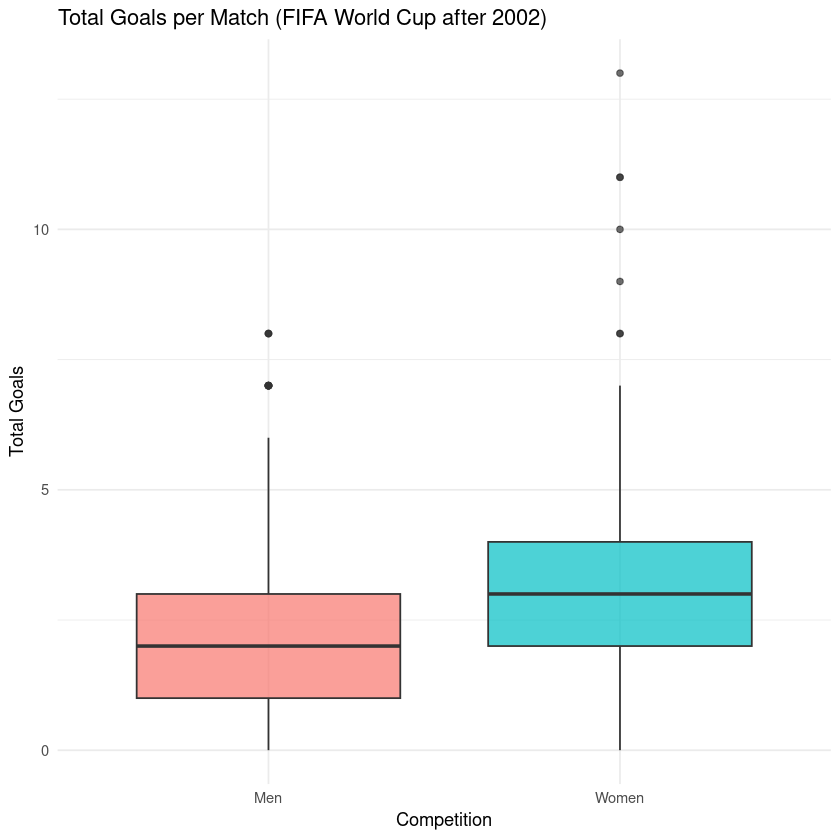

In [13]:
library(tidyverse)

# Load the datasets
women_results <- read_csv("women_results.csv", show_col_types = FALSE)
men_results <- read_csv("men_results.csv", show_col_types = FALSE)

# Filter for FIFA World Cup matches after 2002
women_results <- women_results %>%
  filter(tournament == "FIFA World Cup", date > "2002-01-01")

men_results <- men_results %>%
  filter(tournament == "FIFA World Cup", date > "2002-01-01")

# Calculate total goals per match and label gender
women_goals_df <- women_results %>%
  mutate(total_goals = home_score + away_score,
         gender = "Women") %>%
  select(total_goals, gender)

men_goals_df <- men_results %>%
  mutate(total_goals = home_score + away_score,
         gender = "Men") %>%
  select(total_goals, gender)

# Combine datasets
all_goals_df <- bind_rows(women_goals_df, men_goals_df)

# Wilcoxon test
test_result <- wilcox.test(
  women_goals_df$total_goals,
  men_goals_df$total_goals,
  alternative = "greater"
)

# Extract p-value and evaluate
p_val <- test_result$p.value
result <- ifelse(p_val < 0.10, "reject", "fail to reject")

# Store result
result_df <- tibble(p_val = p_val, result = result)
print(result_df)

# Add ggplot — boxplot comparing total goals
ggplot(all_goals_df, aes(x = gender, y = total_goals, fill = gender)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Total Goals per Match (FIFA World Cup after 2002)",
    x = "Competition",
    y = "Total Goals"
  ) +
  theme_minimal() +
  theme(legend.position = "none")
